In [ ]:
# Exercício com {{ Modelos Não Supervisionados }}
# Feito por: André Luiz Rodrigues Fernandes & Felipe Augusto da Silva

In [18]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering


In [27]:

# Carga e Preparação dos Dados
df = pd.read_csv("/content/sensores_maquina_2000.csv")

X = df[["temperatura", "vibracao", "corrente", "pressao"]].fillna(method="ffill")

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/tmp/ipython-input-3925496481.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = df[["temperatura", "vibracao", "corrente", "pressao"]].fillna(method="ffill")


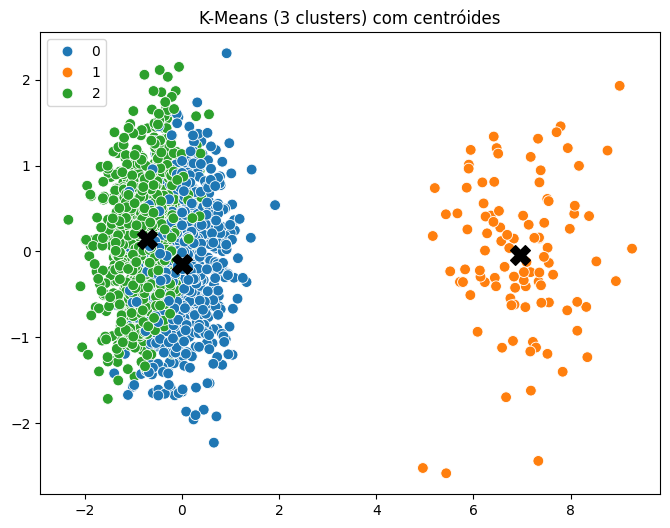

In [28]:
# K-Means (k = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_k = kmeans.fit_predict(X_scaled)
centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_k, palette="tab10", s=60)
plt.scatter(centroids[:,0], centroids[:,1], c="black", s=200, marker="X")
plt.title("K-Means (3 clusters) com centróides")
plt.show()

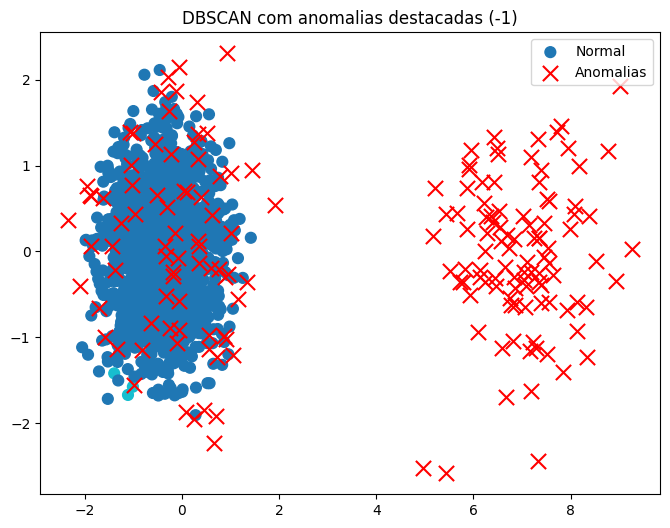

In [29]:
# DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_scaled)

mask_norm = db != -1
mask_anom = db == -1

plt.figure(figsize=(8,6))
plt.scatter(X_pca[mask_norm,0], X_pca[mask_norm,1], c=db[mask_norm], cmap="tab10", s=60, label="Normal")
plt.scatter(X_pca[mask_anom,0], X_pca[mask_anom,1], c="red", s=120, marker="x", label="Anomalias")
plt.title("DBSCAN com anomalias destacadas (-1)")
plt.legend()
plt.show()

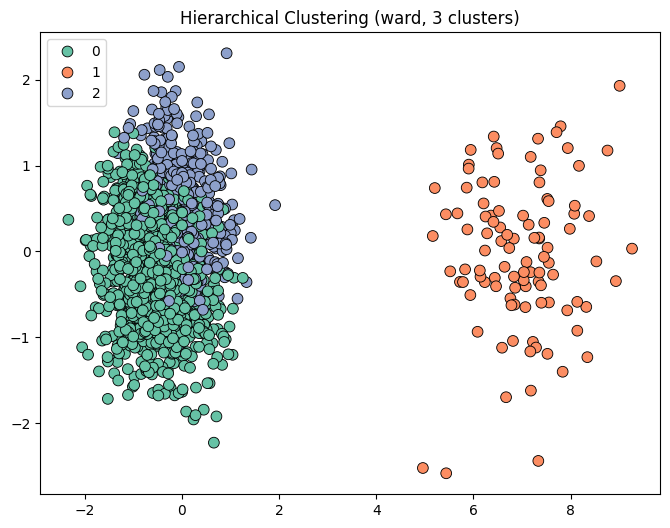

In [30]:
# Hierarquia
hier = AgglomerativeClustering(n_clusters=3, linkage="ward").fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=hier, palette="Set2", s=60, edgecolor="black"
)
plt.title("Hierarchical Clustering (ward, 3 clusters)")
plt.show()